In [112]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [113]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [114]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [115]:
def compute_loss(y, tx, w):
    """Calculate the loss using MSE 

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w, i.e. L(w).
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    e = y - tx @ w
    N = len(y)
    # ***************************************************
    return (e @  e.T/(2*N) )

In [116]:
# test
w = np.array([1, 2]).T
print(w)
L = compute_loss(y, tx, w)
L

[1 2]


2694.4833658870853

# 2. Grid Search

Fill in the function `grid_search()` below:

In [117]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for  i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i,j] = compute_loss(y, tx, np.array([grid_w0[i], grid_w1[j]]).T )
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=18.79354101952324, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.525 seconds


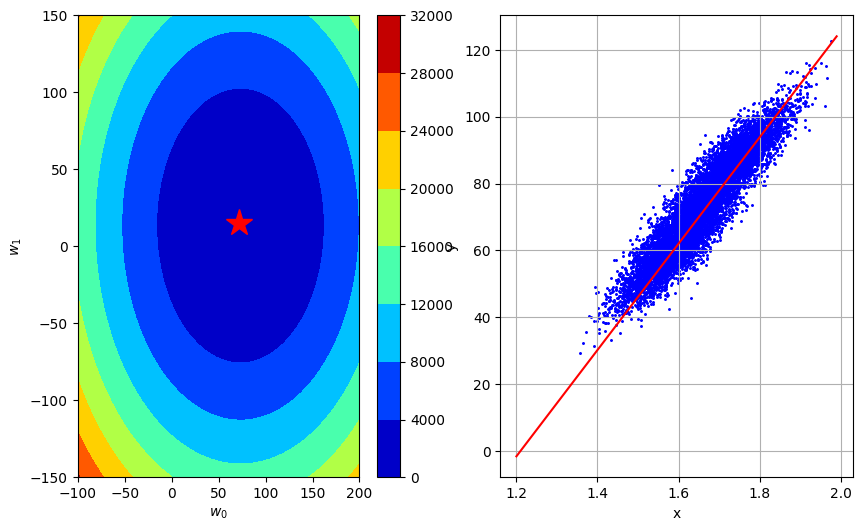

In [118]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [119]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************    
    return - ( tx.T @ (y - tx @ w))/len(y)

In [120]:
# 3b)
w = np.array([100, 20]).T
v = np.array([50, 10]).T

gradw = compute_gradient(y, tx, w)
print(gradw)
print(np.linalg.norm(gradw))
gradv = compute_gradient(y, tx, v)
print(gradv)
print(np.linalg.norm(gradv))

[26.706078    6.52028757]
27.490521129292503
[-23.293922    -3.47971243]
23.55239267824774


Please fill in the functions `gradient_descent` below:

In [121]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
        w = w - gamma * gradient

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [122]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.2367127591656, w0=0, w1=0
GD iter. 1/49: loss=2264.6350560300025, w0=7.329392200210515, w1=1.3479712434988953
GD iter. 2/49: loss=1837.2777140793796, w0=13.925845180399989, w1=2.5611453626479084
GD iter. 3/49: loss=1491.1182670993749, w0=19.86265286257051, w1=3.653002069882016
GD iter. 4/49: loss=1210.7291150455717, w0=25.20577977652398, w1=4.635673106392713
GD iter. 5/49: loss=983.613901881991, w0=30.014593999082102, w1=5.520077039252339
GD iter. 6/49: loss=799.65057921949, w0=34.34252679938441, w1=6.316040578826006
GD iter. 7/49: loss=650.6402878628647, w0=38.23766631965648, w1=7.032407764442307
GD iter. 8/49: loss=529.9419518639979, w0=41.74329188790136, w1=7.677138231496977
GD iter. 9/49: loss=432.17629970491566, w0=44.898354899321745, w1=8.257395651846178
GD iter. 10/49: loss=352.98612145605955, w0=47.73791160960009, w1=8.779627330160462
GD iter. 11/49: loss=288.8420770744858, w0=50.293512648850594, w1=9.249635840643318
GD iter. 12/49: loss=236.88540112541

In [123]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [124]:
def compute_stoch_gradient(y, tx, w, batch_size):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        batch_size: the size of the random mini batch

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    # gradient(y,tx,w): return - ( tx.T @ (y - tx @ w))/len(y)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    # step 1: extract a random mini-batch of the data
    shuffled_indices = np.random.permutation(len(y))
    shuffled_x = tx[shuffled_indices, :]
    shuffled_y = y[shuffled_indices]
    batch_x = tx[0:batch_size, :]
    batch_y = y[0:batch_size]
    # step 2: compute gradient -> use function from GD
    return compute_gradient(batch_y, batch_x, w)
    



def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        loss = compute_loss(y, tx, w)
        stoch_grad = compute_stoch_gradient(y, tx, w, batch_size)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # ***************************************************
        
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
        w = w - gamma * stoch_grad
    return losses, ws

In [125]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2792.2367127591656, w0=0, w1=0
SGD iter. 1/49: loss=1987.7434358012483, w0=10.981967768391842, w1=21.349620658116365
SGD iter. 2/49: loss=1796.7587144029358, w0=16.71524121835305, w1=32.495456802183476
SGD iter. 3/49: loss=1759.469541713478, w0=19.708368237596112, w1=38.314279784556476
SGD iter. 4/49: loss=1757.0139113986734, w0=21.270967585335836, w1=41.352069005799876
SGD iter. 5/49: loss=1760.3684307496596, w0=22.08674209335324, w1=42.93798481397234
SGD iter. 6/49: loss=1763.3833772751736, w0=22.51262736515606, w1=43.76593197140608
SGD iter. 7/49: loss=1765.3017821976214, w0=22.734966091061295, w1=44.19817212688605
SGD iter. 8/49: loss=1766.3971793427265, w0=22.85104080016758, w1=44.42382849919421
SGD iter. 9/49: loss=1766.9946292732727, w0=22.911639051953244, w1=44.54163522704608
SGD iter. 10/49: loss=1767.313508418035, w0=22.943275126234646, w1=44.603137700852635
SGD iter. 11/49: loss=1767.481883729791, w0=22.959791133981508, w1=44.63524583553474
SGD iter. 12/

In [126]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [127]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

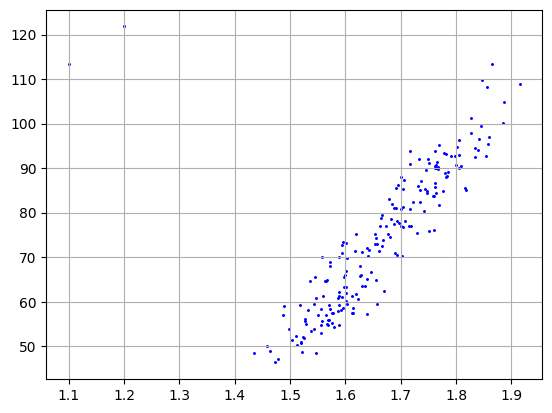

In [128]:
y.shape, tx.shape
# visualisation of the sub_sample
plt.scatter(height, weight, marker=".", color="b", s=5)
plt.grid()

In [129]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
# Initialization
w_initial = np.array([0,0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
# ***************************************************

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2869.8351145358533, w0=0, w1=0
GD iter. 1/49: loss=318.28212470159497, w0=51.847464098448484, w1=7.724426406192441
GD iter. 2/49: loss=88.6423556165126, w0=67.401703327983, w1=10.041754328050121
GD iter. 3/49: loss=67.9747763988552, w0=72.06797509684336, w1=10.736952704607413
GD iter. 4/49: loss=66.11469426926604, w0=73.46785662750146, w1=10.945512217574594
GD iter. 5/49: loss=65.94728687760302, w0=73.88782108669889, w1=11.00808007146475
GD iter. 6/49: loss=65.93222021235334, w0=74.01381042445813, w1=11.026850427631796
GD iter. 7/49: loss=65.93086421248087, w0=74.05160722578589, w1=11.03248153448191
GD iter. 8/49: loss=65.93074217249236, w0=74.06294626618423, w1=11.034170866536943
GD iter. 9/49: loss=65.93073118889338, w0=74.06634797830372, w1=11.034677666153454
GD iter. 10/49: loss=65.93073020036948, w0=74.06736849193958, w1=11.034829706038407
GD iter. 11/49: loss=65.93073011140233, w0=74.06767464603033, w1=11.034875318003893
GD iter. 12/49: loss=65.93073010339529,

In [130]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [131]:
# we take the full data
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Recall the definition of the MAE: 
$$L(w)=\text{MAE}(w):=\dfrac{1}{N}\sum_{n=1}^N|y_n - f_w(x_n)|$$
Here $w\in\R^2$, and $f_w(x_n) = w_0 + w_1x_{n1} = w^T (1, x_{n1})$.

The subgradient of $h(x):=|x|$ is:
$$\partial h(w) = \begin{cases} (-1, 1) &\text{ if } w=0,\\
1 &\text{ if } w>0,\\
-1 & \text{ if } w<0 \end{cases}.$$
We use the chain rule to find the subgradient of $L$ at $w$ : if $L = h\circ q$ with $q$ differentiable, then 
$$\partial L(w) = \partial h(q(w))\nabla q(w).$$


We find that a subgradient is given by
$$ -\frac{1}{N}X^T \text{sgn}(y-Xw)$$

In [132]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    e = y - tx @ w
    s = np.sign(e)
    return (- tx.T @ s / len(y))
    # ***************************************************
    
    

In [133]:
# need a function for the loss with MAE
def compute_loss_mae(y, tx, w):
    """Calculate the loss using MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w, i.e. L(w).
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    e = y - tx @ w
    # ***************************************************
    return np.mean(np.abs(e))


In [134]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        loss = compute_loss_mae(y, tx, w)
        sub_grad = compute_subgradient_mae(y, tx, w)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        w = w - gamma * sub_grad
        # ***************************************************
        
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [135]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.29392200210518, w0=0.7, w1=-6.843947630841284e-16
SubGD iter. 1/499: loss=72.59392200210517, w0=1.4, w1=-1.3687895261682568e-15
SubGD iter. 2/499: loss=71.89392200210517, w0=2.0999999999999996, w1=-2.0531842892523855e-15
SubGD iter. 3/499: loss=71.19392200210518, w0=2.8, w1=-2.7375790523365137e-15
SubGD iter. 4/499: loss=70.49392200210517, w0=3.5, w1=-3.421973815420642e-15
SubGD iter. 5/499: loss=69.79392200210518, w0=4.2, w1=-4.10636857850477e-15
SubGD iter. 6/499: loss=69.09392200210517, w0=4.9, w1=-4.790763341588898e-15
SubGD iter. 7/499: loss=68.39392200210519, w0=5.6000000000000005, w1=-5.4751581046730266e-15
SubGD iter. 8/499: loss=67.69392200210518, w0=6.300000000000001, w1=-6.159552867757155e-15
SubGD iter. 9/499: loss=66.99392200210517, w0=7.000000000000001, w1=-6.843947630841283e-15
SubGD iter. 10/499: loss=66.29392200210518, w0=7.700000000000001, w1=-7.528342393925412e-15
SubGD iter. 11/499: loss=65.59392200210517, w0=8.4, w1=-8.21273715700954e-15


In [136]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=1001, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [142]:
def compute_stoch_subgradient_mae(y, tx, w, batch_size):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        batch_size: size of the mini-batch 

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    shuffled_indices = np.random.permutation(len(y))
    shuffled_x = tx[shuffled_indices, :]
    shuffled_y = y[shuffled_indices]
    batch_x = tx[0:batch_size, :]
    #print(batch_x.shape)
    batch_y = y[0:batch_size]
    #print(batch_y.shape)
    return compute_subgradient_mae(batch_y, batch_x, w)
    # ***************************************************

In [138]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        loss = compute_loss(y, tx, w)
        stoch_grad = compute_stoch_subgradient_mae(y, tx, w, batch_size)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        # ***************************************************

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
        w = w - gamma * stoch_grad
    return losses, ws

In [143]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=2792.2367127591656, w0=0, w1=0
SubSGD iter. 1/499: loss=2723.758141335575, w0=0.7, w1=1.360843045241418
SubSGD iter. 2/499: loss=2657.621463705766, w0=1.4, w1=2.721686090482836
SubSGD iter. 3/499: loss=2593.826679869738, w0=2.0999999999999996, w1=4.082529135724254
SubSGD iter. 4/499: loss=2532.373789827492, w0=2.8, w1=5.443372180965672
SubSGD iter. 5/499: loss=2473.2627935790288, w0=3.5, w1=6.80421522620709
SubSGD iter. 6/499: loss=2416.493691124346, w0=4.2, w1=8.165058271448508
SubSGD iter. 7/499: loss=2362.066482463445, w0=4.9, w1=9.525901316689927
SubSGD iter. 8/499: loss=2309.9811675963288, w0=5.6000000000000005, w1=10.886744361931346
SubSGD iter. 9/499: loss=2260.237746522992, w0=6.300000000000001, w1=12.247587407172764
SubSGD iter. 10/499: loss=2212.8362192434374, w0=7.000000000000001, w1=13.608430452414183
SubSGD iter. 11/499: loss=2167.7765857576655, w0=7.700000000000001, w1=14.969273497655601
SubSGD iter. 12/499: loss=2125.0588460656745, w0=8.4, w1=16.

In [144]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>